In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

In [0]:
feature = pd.read_csv("/content/drive/My Drive/Deep learning/features.csv")
dam_prices = pd.read_csv("/content/drive/My Drive/Deep learning/dam_prices.csv")
rt_prices = pd.read_csv("/content/drive/My Drive/Deep learning/rt_prices.csv")

#Prices exploration

We will explore the prices by getting their statistics (mean, median, etc) and by making graphics

In [0]:
nodes = dam_prices.columns
nodes

Index(['dates', 'SMECO_RESID_AGG..DALMP..Average',
       'DOM_RESID_AGG..DALMP..Average', 'AEPKY_RESID_AGG..DALMP..Average'],
      dtype='object')

In [0]:
dam_prices.describe()


,SMECO_RESID_AGG..DALMP..Average,DOM_RESID_AGG..DALMP..Average,AEPKY_RESID_AGG..DALMP..Average
count,16871.000000,16871.000000,16871.000000
mean,31.509928,31.463714,30.636697
std,12.417348,13.550347,11.786692
min,10.150000,10.070000,9.970000
25%,23.030000,22.850000,22.820000
50%,28.720000,28.390000,27.910000
75%,37.130000,36.790000,35.720000
max,164.340000,281.070000,162.810000


In [0]:
rt_prices.describe()

,SMECO_RESID_AGG..RTLMP..Average,DOM_RESID_AGG..RTLMP..Average,AEPKY_RESID_AGG..RTLMP..Average
count,16871.000000,16871.000000,16871.000000
mean,31.005371,30.998165,30.201054
std,24.817170,24.912221,23.029599
min,-53.080000,-53.560000,-53.320000
25%,21.530000,21.500000,21.420000
50%,26.230000,26.050000,25.540000
75%,33.445000,33.230000,32.050000
max,942.690000,872.680000,802.090000


## SMECO_RESID_AGG

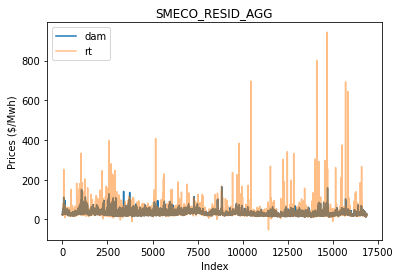

In [0]:
#SMECO_RESID_AGG

plt.plot(dam_prices["SMECO_RESID_AGG..DALMP..Average"])
plt.plot(rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.5)
plt.title("SMECO_RESID_AGG")
plt.ylabel("Prices ($/Mwh)")
plt.xlabel("Index")
plt.legend(["dam","rt"])

We observe a lot of volatility for the the real-time prices in comparation to the dam prices. Sometimes the real prices are very high in comparation to the dam prices

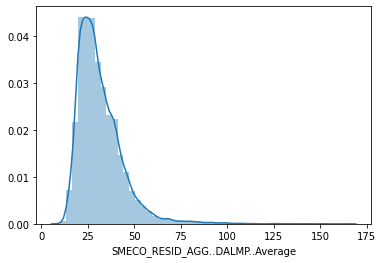

In [0]:
sns.distplot(dam_prices["SMECO_RESID_AGG..DALMP..Average"])

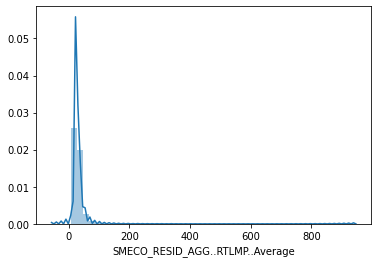

In [0]:
sns.distplot(rt_prices["SMECO_RESID_AGG..RTLMP..Average"])

We observe that both distributions are very skweded to the right. It may be interesting to explore the logaritmic transformation

## DOM_RESID_AGG

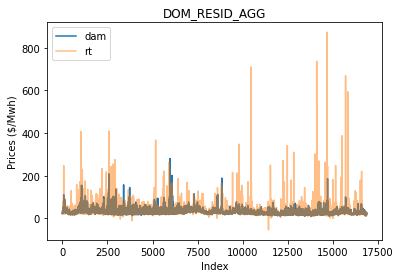

In [0]:
#DOM_RESID_AGG

plt.plot(dam_prices["DOM_RESID_AGG..DALMP..Average"])
plt.plot(rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.5)
plt.title("DOM_RESID_AGG")
plt.ylabel("Prices ($/Mwh)")
plt.xlabel("Index")
plt.legend(["dam","rt"])

We observe a lot of volatility for the the real-time prices in comparation to the dam prices. Sometimes the real prices are very high in comparation to the dam prices

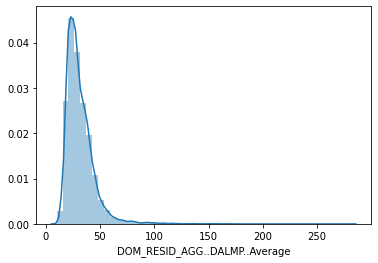

In [0]:
sns.distplot(dam_prices["DOM_RESID_AGG..DALMP..Average"])

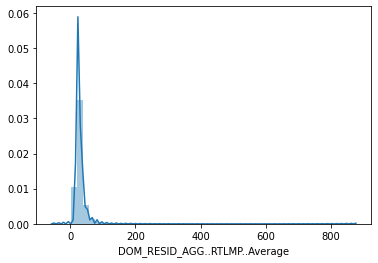

In [0]:
sns.distplot(rt_prices["DOM_RESID_AGG..RTLMP..Average"])

We observe that both distributions are very skweded to the right. It may be interesting to explore the logaritmic transformation

## AEPKY_RESID_AGG


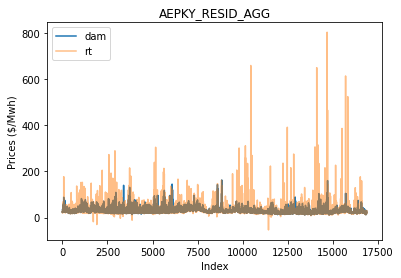

In [0]:
#AEPKY_RESID_AGG

plt.plot(dam_prices["AEPKY_RESID_AGG..DALMP..Average"])
plt.plot(rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.5)
plt.title("AEPKY_RESID_AGG")
plt.ylabel("Prices ($/Mwh)")
plt.xlabel("Index")
plt.legend(["dam","rt"])

We observe a lot of volatility for the the real-time prices in comparation to the dam prices. Sometimes the real prices are very high in comparation to the dam prices

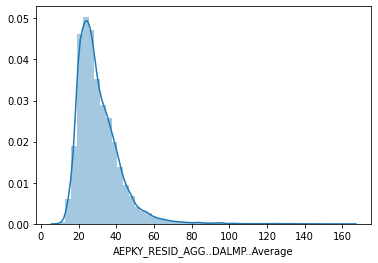

In [0]:
sns.distplot(dam_prices["AEPKY_RESID_AGG..DALMP..Average"])

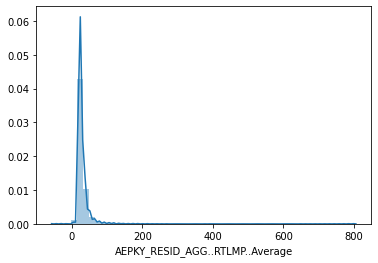

In [0]:
sns.distplot(rt_prices["AEPKY_RESID_AGG..RTLMP..Average"])

We observe that both distributions are very skweded to the right. It may be interesting to explore the logaritmic transformation

# Features exploration

In [21]:
feature.describe()

,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2
count,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000
mean,2.617566,31584.865229,48062.871844,89947.722706,0.000739,0.000551,0.003675,2489.141242,5332.290559
std,0.948177,6389.135355,7909.810384,16821.953500,0.044354,0.038549,0.157463,1707.361513,3060.371602
min,0.680000,1665.000000,31671.170000,1665.000000,-1.000000,-1.000000,-1.330561,11.000000,163.000000
25%,2.150000,27565.000000,42624.000000,79052.000000,-0.024721,-0.020202,-0.022202,1106.000000,2921.000000
50%,2.400000,30712.000000,47084.000000,88309.000000,-0.000367,-0.002366,-0.001261,2095.000000,4838.000000
75%,2.750000,34846.500000,52678.000000,99427.500000,0.027030,0.022679,0.025645,3624.000000,7269.000000
max,9.220000,55989.000000,77919.000000,151950.000000,0.302427,0.305804,6.782565,8124.000000,16134.000000


## Gas Price

Text(0.5, 0, 'Index')

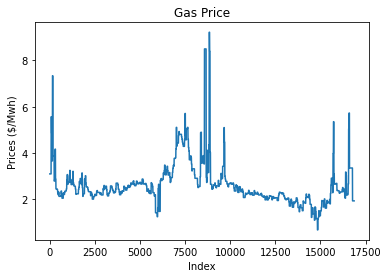

In [6]:
plt.plot(feature["Gas.price"])
plt.title("Gas Price")
plt.ylabel("Prices ($/Mwh)")
plt.xlabel("Index")

We observe that the price has certain periods of big volatility bit it is quite stable generallly

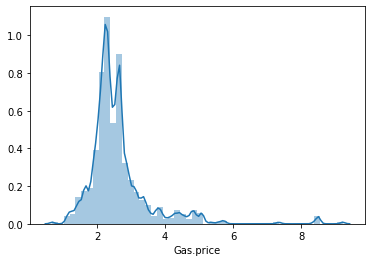

In [7]:
sns.distplot(feature["Gas.price"])

##MidAtl_Pool_pr

Text(0.5, 0, 'Index')

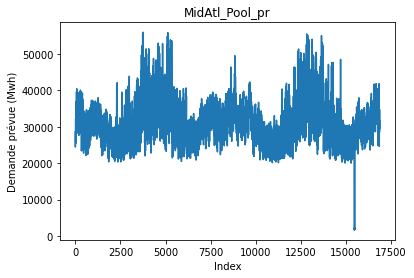

In [26]:
plt.plot(feature["MidAtl_Pool_pr"])
plt.title("MidAtl_Pool_pr")
plt.ylabel("Demande prévue (Mwh)")
plt.xlabel("Index")

We observe that there are days when the predicted demand is 0 Mw wich isn't normal. These demands must be changed before modeling

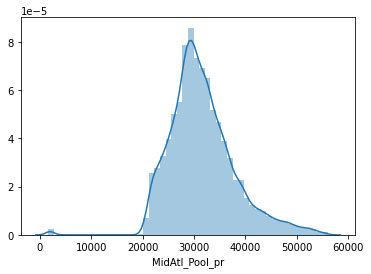

In [27]:
sns.distplot(feature["MidAtl_Pool_pr"])

### Cleaning zeros

In [0]:
zero_demand = feature[feature["MidAtl_Pool_pr"]==0]


In [13]:
zero_demand

,dates,Gas.price,MidAtl_Pool_pr,western_Pool_prev,Total_Pool_prev,Percent.diff.MidAtl_Pool_pr,Percent.diff.western_Pool_prev,Percent.diff.Total_Pool_prev,PJM.POOL.J2,MISO_POOL_J2
15983,11/25/2019 1:00,2.375,0.0,0.0,10659.0,-1.0,-1.0,-0.881952,150.0,1402.0
16007,11/26/2019 1:00,2.375,0.0,0.0,10659.0,-1.0,-1.0,-0.881952,150.0,1402.0


In [16]:
a = feature["MidAtl_Pool_pr"].mean()
b = feature["western_Pool_prev"].mean()

feature["MidAtl_Pool_pr"][15983] = a
feature["MidAtl_Pool_pr"][16007] = a

feature["western_Pool_prev"][15983] = b
feature["western_Pool_prev"][16007] = b


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

In [0]:
feature.to_csv("/content/drive/My Drive/Deep learning/features.csv", index=False)

## western_Pool_prev

Text(0.5, 0, 'Index')

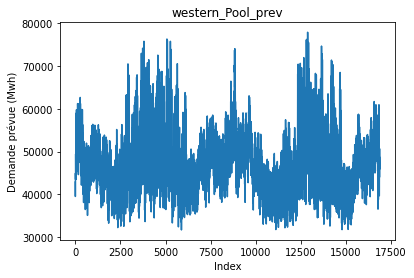

In [29]:
plt.plot(feature["western_Pool_prev"])
plt.title("western_Pool_prev")
plt.ylabel("Demande prévue (Mwh)")
plt.xlabel("Index")

We observe some seasonality, but also a lot of variability

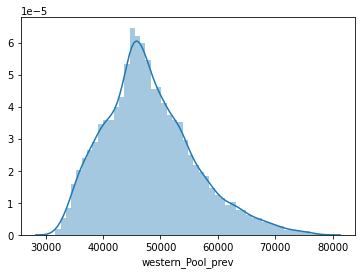

In [30]:
sns.distplot(feature["western_Pool_prev"])

## Total_Pool_prev

Text(0.5, 0, 'Index')

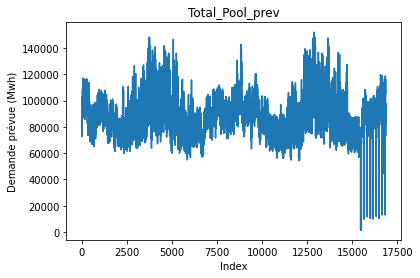

In [31]:
plt.plot(feature["Total_Pool_prev"])
plt.title("Total_Pool_prev")
plt.ylabel("Demande prévue (Mwh)")
plt.xlabel("Index")

We observe some seasonality, but also a lot of variability

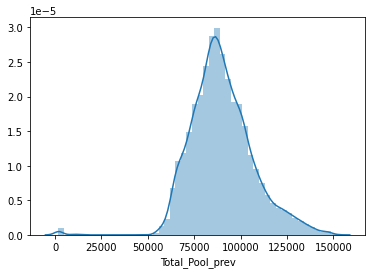

In [32]:
sns.distplot(feature["Total_Pool_prev"])

## PJM.POOL.J2

Text(0.5, 0, 'Index')

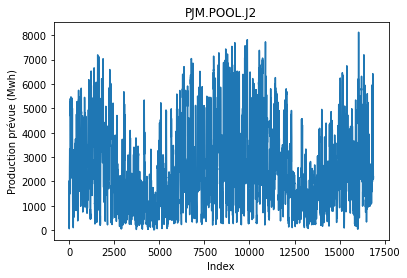

In [33]:
plt.plot(feature["PJM.POOL.J2"])
plt.title("PJM.POOL.J2")
plt.ylabel("Production prévue (Mwh)")
plt.xlabel("Index")

We observe some seasonality, but also a lot of variability

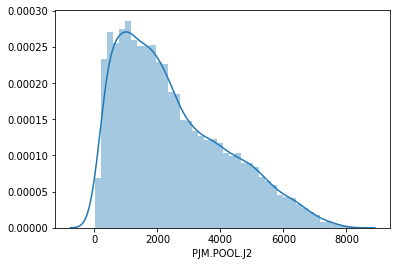

In [34]:
sns.distplot(feature["PJM.POOL.J2"])

It is normal that there are values close to zero, since some days there's not enough wind to produce wind energy

## MISO_POOL_J2

Text(0.5, 0, 'Index')

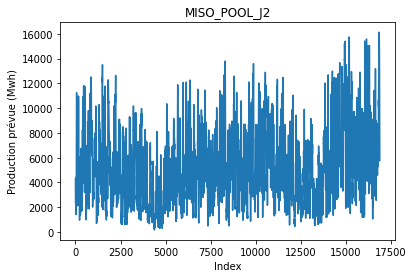

In [35]:
plt.plot(feature["MISO_POOL_J2"])
plt.title("MISO_POOL_J2")
plt.ylabel("Production prévue (Mwh)")
plt.xlabel("Index")

We observe some seasonality, but also a lot of variability

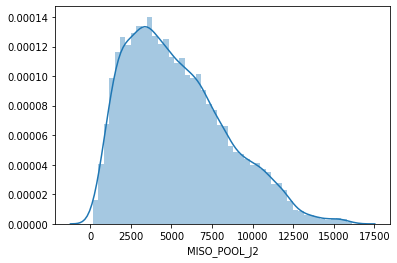

In [36]:
sns.distplot(feature["MISO_POOL_J2"])

It is normal that there are values close to zero, since some days there's not enough wind to produce wind energy

# Correlation between nodes prices and features

## SMECO_RESID_AGG 

### Gas price



```
# # For regression line
b, m = polyfit(dam_prices["SMECO_RESID_AGG..DALMP..Average"], feature["Gas.price"], 1)
ypred = b + feature["Gas.price"]*m
```



Text(0.5, 1.0, 'SMECO_RESID_AGG vs Gas price')

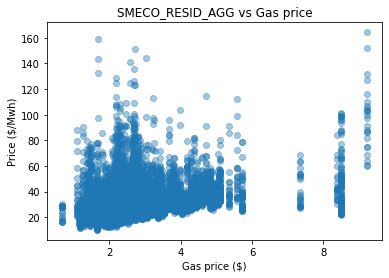

In [52]:
plt.scatter(feature["Gas.price"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("SMECO_RESID_AGG (DAM) vs Gas price")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs Gas price')

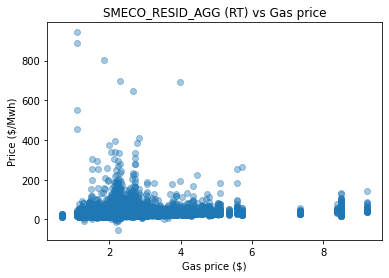

In [54]:
plt.scatter(feature["Gas.price"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("SMECO_RESID_AGG (RT) vs Gas price")

### MidAtl_Pool_pr

Text(0.5, 1.0, 'SMECO_RESID_AGG vs MidAtl_Pool_pr')

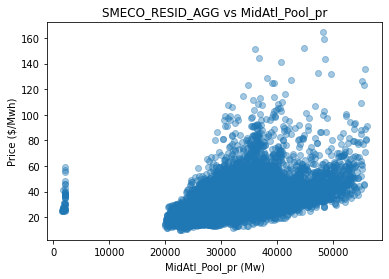

In [55]:
plt.scatter(feature["MidAtl_Pool_pr"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pr (Mw)")
plt.title("SMECO_RESID_AGG vs MidAtl_Pool_pr")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs MidAtl_Pool_pr')

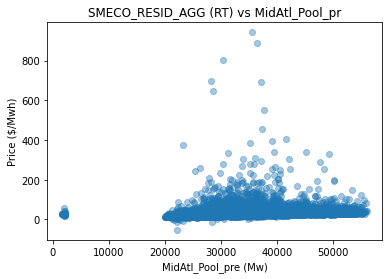

In [56]:
plt.scatter(feature["MidAtl_Pool_pr"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pre (Mw)")
plt.title("SMECO_RESID_AGG (RT) vs MidAtl_Pool_pr")

### western_Pool_prev

Text(0.5, 1.0, 'SMECO_RESID_AGG vs western_Pool_prev')

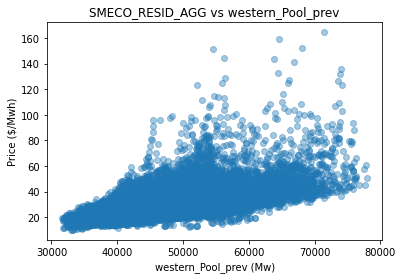

In [57]:
plt.scatter(feature["western_Pool_prev"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("SMECO_RESID_AGG vs western_Pool_prev")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs western_Pool_prev')

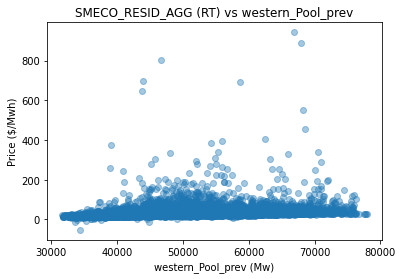

In [58]:
plt.scatter(feature["western_Pool_prev"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("SMECO_RESID_AGG (RT) vs western_Pool_prev")

### Total_Pool_prev

Text(0.5, 1.0, 'SMECO_RESID_AGG vs Total_Pool_prev')

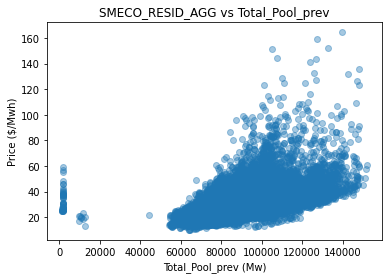

In [59]:
plt.scatter(feature["Total_Pool_prev"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("SMECO_RESID_AGG vs Total_Pool_prev")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs Total_Pool_prev')

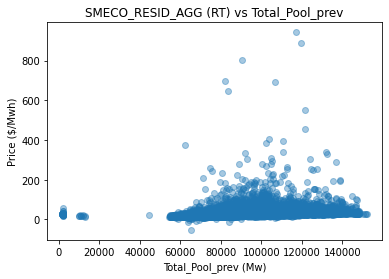

In [60]:
plt.scatter(feature["Total_Pool_prev"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("SMECO_RESID_AGG (RT) vs Total_Pool_prev")

### PJM.POOL.J2

Text(0.5, 1.0, 'SMECO_RESID_AGG vs PJM.POOL.J2')

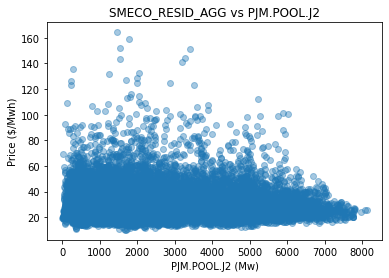

In [61]:
plt.scatter(feature["PJM.POOL.J2"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("SMECO_RESID_AGG vs PJM.POOL.J2")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs PJM.POOL.J2')

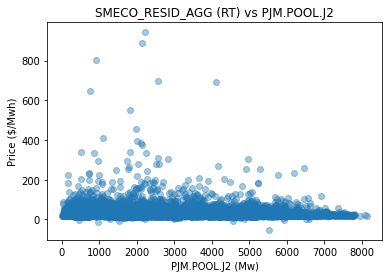

In [62]:
plt.scatter(feature["PJM.POOL.J2"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("SMECO_RESID_AGG (RT) vs PJM.POOL.J2")

### MISO_POOL_J2

Text(0.5, 1.0, 'SMECO_RESID_AGG vs MISO_POOL_J2')

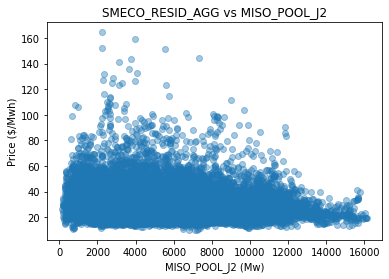

In [63]:
plt.scatter(feature["MISO_POOL_J2"], dam_prices["SMECO_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("SMECO_RESID_AGG vs MISO_POOL_J2")

Text(0.5, 1.0, 'SMECO_RESID_AGG (RT) vs MISO_POOL_J2')

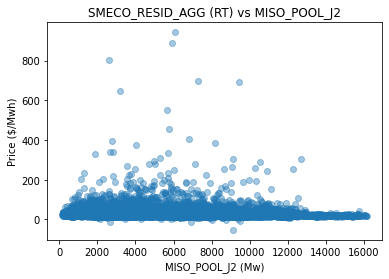

In [64]:
plt.scatter(feature["MISO_POOL_J2"], rt_prices["SMECO_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("SMECO_RESID_AGG (RT) vs MISO_POOL_J2")

## DOM_RESID_AGG 

### Gas price



```
# # For regression line
b, m = polyfit(dam_prices["SMECO_RESID_AGG..DALMP..Average"], feature["Gas.price"], 1)
ypred = b + feature["Gas.price"]*m
```



Text(0.5, 1.0, 'DOM_RESID_AGG (DAM) vs Gas price')

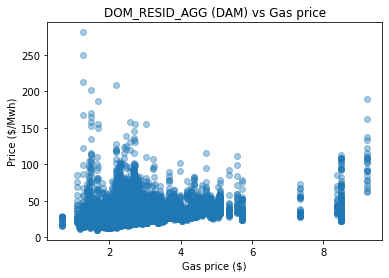

In [65]:
plt.scatter(feature["Gas.price"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("DOM_RESID_AGG (DAM) vs Gas price")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs Gas price')

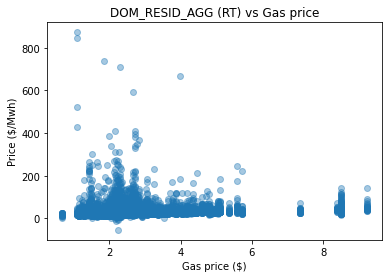

In [66]:
plt.scatter(feature["Gas.price"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("DOM_RESID_AGG (RT) vs Gas price")

### MidAtl_Pool_pr

Text(0.5, 1.0, 'DOM_RESID_AGG vs MidAtl_Pool_pr')

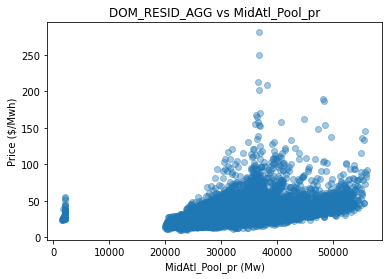

In [67]:
plt.scatter(feature["MidAtl_Pool_pr"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pr (Mw)")
plt.title("DOM_RESID_AGG vs MidAtl_Pool_pr")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs MidAtl_Pool_pr')

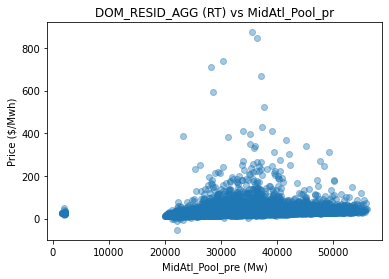

In [68]:
plt.scatter(feature["MidAtl_Pool_pr"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pre (Mw)")
plt.title("DOM_RESID_AGG (RT) vs MidAtl_Pool_pr")

### western_Pool_prev

Text(0.5, 1.0, 'DOM_RESID_AGG vs western_Pool_prev')

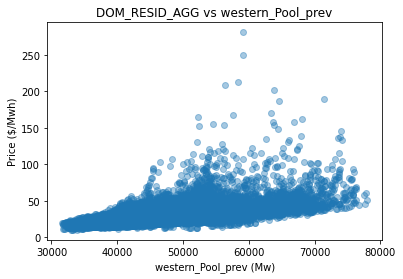

In [69]:
plt.scatter(feature["western_Pool_prev"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("DOM_RESID_AGG vs western_Pool_prev")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs western_Pool_prev')

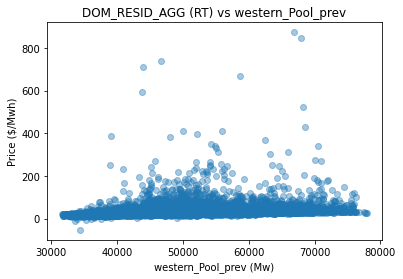

In [70]:
plt.scatter(feature["western_Pool_prev"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("DOM_RESID_AGG (RT) vs western_Pool_prev")

### Total_Pool_prev

Text(0.5, 1.0, 'DOM_RESID_AGG vs Total_Pool_prev')

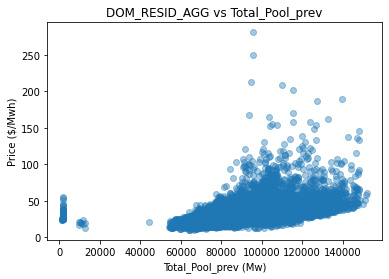

In [71]:
plt.scatter(feature["Total_Pool_prev"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("DOM_RESID_AGG vs Total_Pool_prev")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs Total_Pool_prev')

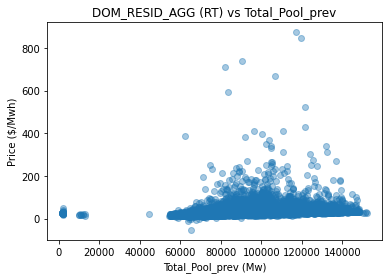

In [72]:
plt.scatter(feature["Total_Pool_prev"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("DOM_RESID_AGG (RT) vs Total_Pool_prev")

### PJM.POOL.J2

Text(0.5, 1.0, 'DOM_RESID_AGG vs PJM.POOL.J2')

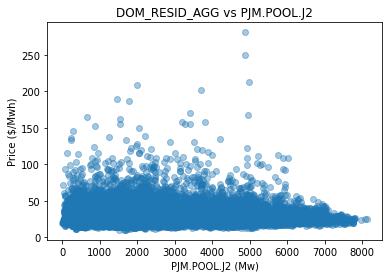

In [73]:
plt.scatter(feature["PJM.POOL.J2"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("DOM_RESID_AGG vs PJM.POOL.J2")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs PJM.POOL.J2')

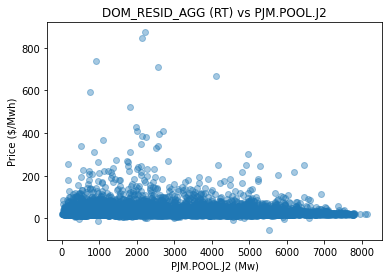

In [74]:
plt.scatter(feature["PJM.POOL.J2"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("DOM_RESID_AGG (RT) vs PJM.POOL.J2")

### MISO_POOL_J2

Text(0.5, 1.0, 'DOM_RESID_AGG vs MISO_POOL_J2')

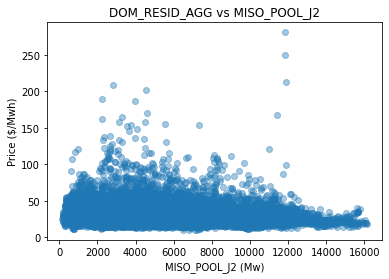

In [75]:
plt.scatter(feature["MISO_POOL_J2"], dam_prices["DOM_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("DOM_RESID_AGG vs MISO_POOL_J2")

Text(0.5, 1.0, 'DOM_RESID_AGG (RT) vs MISO_POOL_J2')

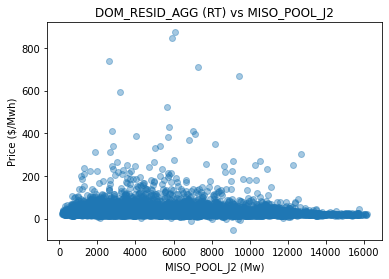

In [76]:
plt.scatter(feature["MISO_POOL_J2"], rt_prices["DOM_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("DOM_RESID_AGG (RT) vs MISO_POOL_J2")

## AEPKY_RESID_AGG 

### Gas price

Text(0.5, 1.0, 'AEPKY_RESID_AGG (DAM) vs Gas price')

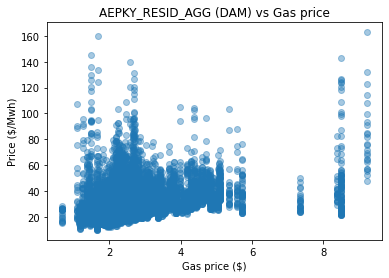

In [88]:
plt.scatter(feature["Gas.price"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("AEPKY_RESID_AGG (DAM) vs Gas price")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs Gas price')

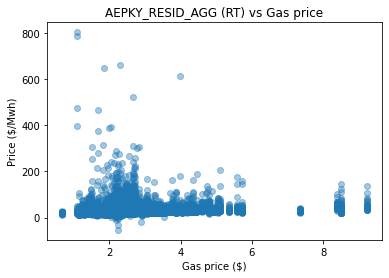

In [89]:
plt.scatter(feature["Gas.price"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Gas price ($)")
plt.title("AEPKY_RESID_AGG (RT) vs Gas price")

### MidAtl_Pool_pr

Text(0.5, 1.0, 'AEPKY_RESID_AGG vs MidAtl_Pool_pr')

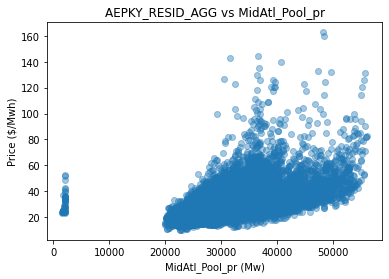

In [90]:
plt.scatter(feature["MidAtl_Pool_pr"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pr (Mw)")
plt.title("AEPKY_RESID_AGG vs MidAtl_Pool_pr")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs MidAtl_Pool_pr')

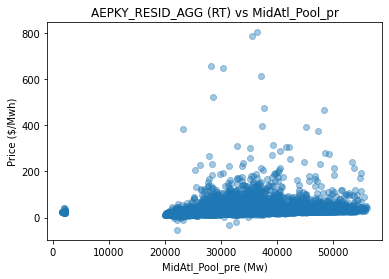

In [91]:
plt.scatter(feature["MidAtl_Pool_pr"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MidAtl_Pool_pre (Mw)")
plt.title("AEPKY_RESID_AGG (RT) vs MidAtl_Pool_pr")

### western_Pool_prev

Text(0.5, 1.0, 'AEPKY_RESID_AGG vs western_Pool_prev')

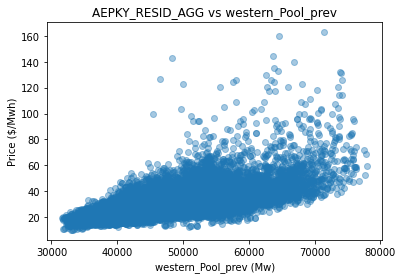

In [92]:
plt.scatter(feature["western_Pool_prev"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("AEPKY_RESID_AGG vs western_Pool_prev")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs western_Pool_prev')

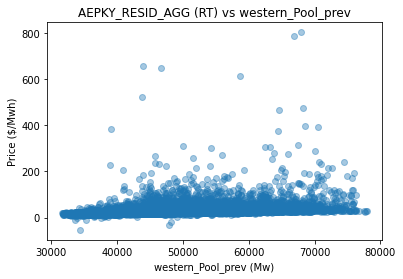

In [93]:
plt.scatter(feature["western_Pool_prev"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("western_Pool_prev (Mw)")
plt.title("AEPKY_RESID_AGG (RT) vs western_Pool_prev")

### Total_Pool_prev

Text(0.5, 1.0, 'AEPKY_RESID_AGG vs Total_Pool_prev')

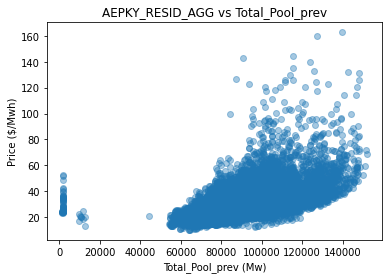

In [94]:
plt.scatter(feature["Total_Pool_prev"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("AEPKY_RESID_AGG vs Total_Pool_prev")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs Total_Pool_prev')

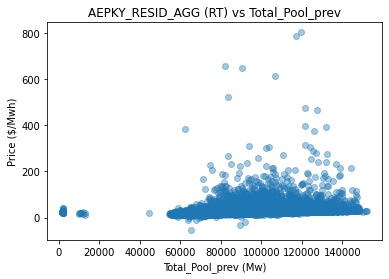

In [95]:
plt.scatter(feature["Total_Pool_prev"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("Total_Pool_prev (Mw)")
plt.title("AEPKY_RESID_AGG (RT) vs Total_Pool_prev")

### PJM.POOL.J2

Text(0.5, 1.0, 'AEPKY_RESID_AGG vs PJM.POOL.J2')

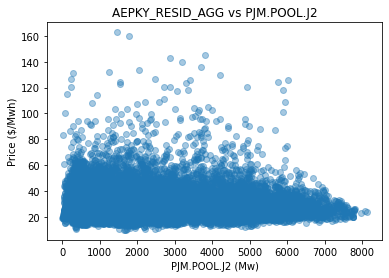

In [96]:
plt.scatter(feature["PJM.POOL.J2"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("AEPKY_RESID_AGG vs PJM.POOL.J2")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs PJM.POOL.J2')

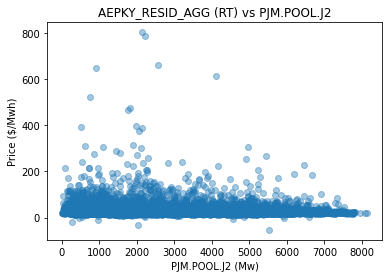

In [97]:
plt.scatter(feature["PJM.POOL.J2"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("PJM.POOL.J2 (Mw)")
plt.title("AEPKY_RESID_AGG (RT) vs PJM.POOL.J2")

### MISO_POOL_J2

Text(0.5, 1.0, 'AEPKY_RESID_AGG vs MISO_POOL_J2')

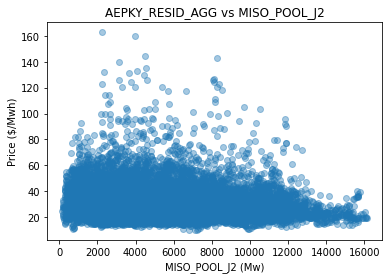

In [98]:
plt.scatter(feature["MISO_POOL_J2"], dam_prices["AEPKY_RESID_AGG..DALMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("AEPKY_RESID_AGG vs MISO_POOL_J2")

Text(0.5, 1.0, 'AEPKY_RESID_AGG (RT) vs MISO_POOL_J2')

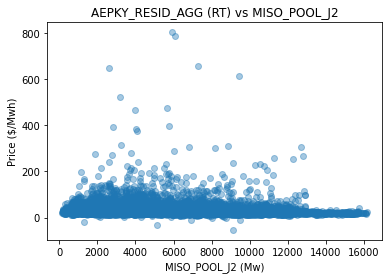

In [99]:
plt.scatter(feature["MISO_POOL_J2"], rt_prices["AEPKY_RESID_AGG..RTLMP..Average"], alpha = 0.4)
plt.ylabel("Price ($/Mwh)")
plt.xlabel("MISO_POOL_J2 (Mw)")
plt.title("AEPKY_RESID_AGG (RT) vs MISO_POOL_J2")